In [8]:
import sys
sys.path.append('..')
from gptcast.models import GPTCast
from gptcast.data import MiaradDataModule
from gptcast.utils.plotting import plot_miarad
from gptcast.utils.converters import dbz_to_rainfall
import numpy as np
from datetime import datetime
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
from einops import rearrange

## Load pretrained model and a radar sequence of data from the dataset

In [ ]:
gpt8 = GPTCast.load_from_zenodo("gptcast_8", device=device).eval()
gpt16 = GPTCast.load_from_zenodo("gptcast_16", device=device).eval()

In [ ]:
md = MiaradDataModule.load_from_zenodo(
    clip_and_normalize=[0,60,0,60],
    crop=None,
    batch_size=1,
    num_workers=1,
    pin_memory=False,
    seq_len=7,
)
md.setup(stage="test")
tdl = md.test_dataloader()
itr = iter(tdl)
el = next(itr)

In [4]:
dt = datetime.strptime(el['file_path_'][0], 'COMP_%Y%m%d%H%M')
mask = el['mask'].cpu().numpy().squeeze()
data = rearrange(el['image'].cpu().numpy().squeeze(), 'h w s -> s h w')
input_data = np.ma.array(data, mask=np.broadcast_to(mask, data.shape))

# Plot input radar sequence

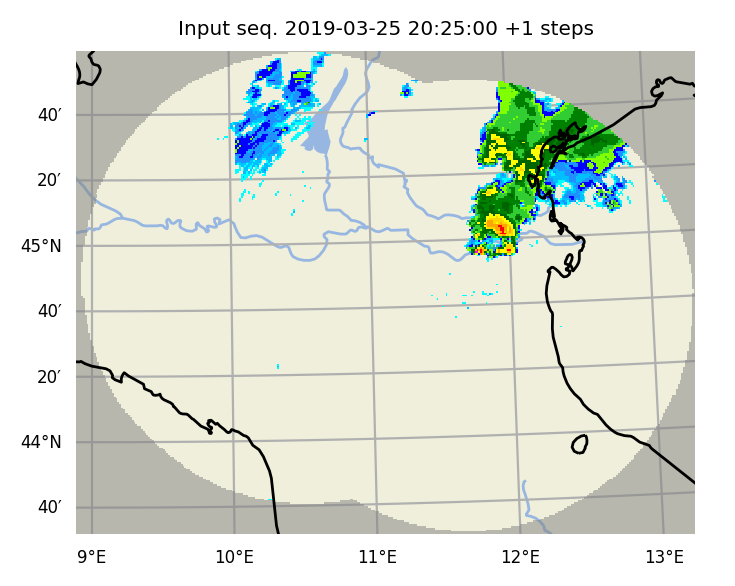

<Figure size 640x480 with 0 Axes>

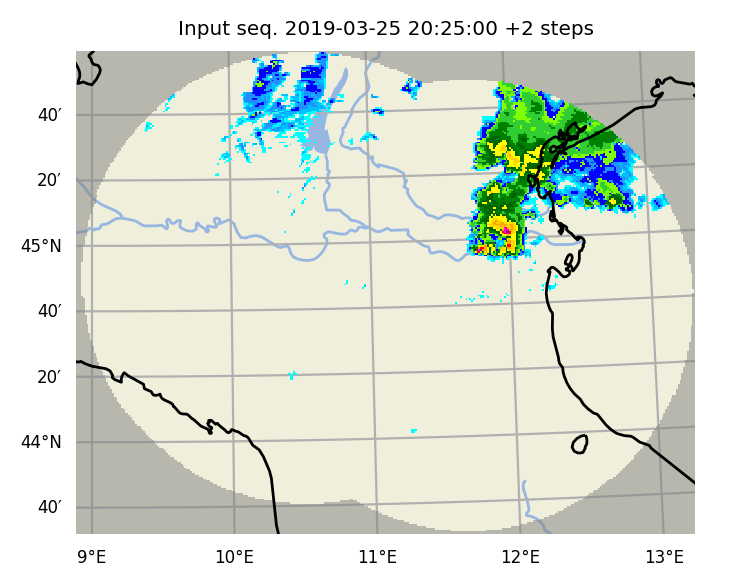

<Figure size 640x480 with 0 Axes>

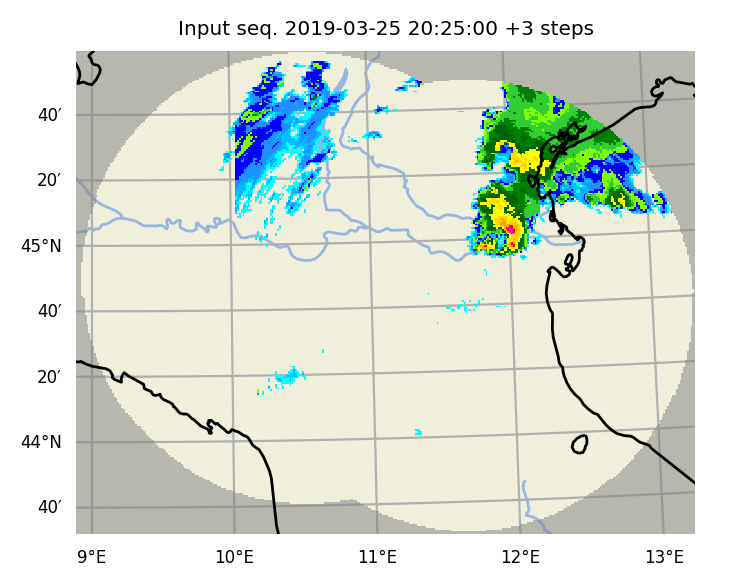

<Figure size 640x480 with 0 Axes>

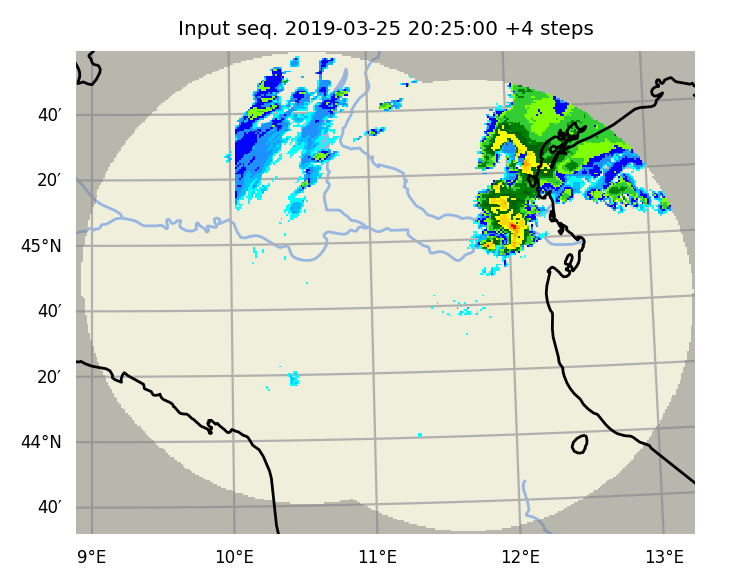

<Figure size 640x480 with 0 Axes>

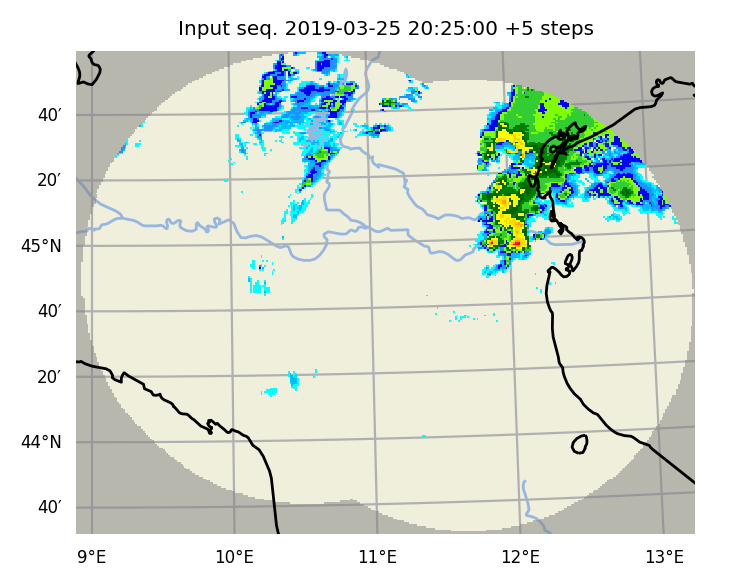

<Figure size 640x480 with 0 Axes>

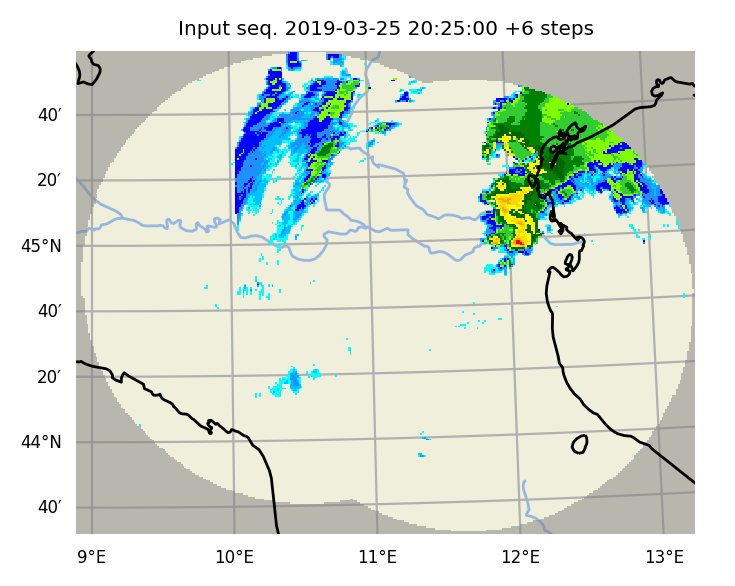

<Figure size 640x480 with 0 Axes>

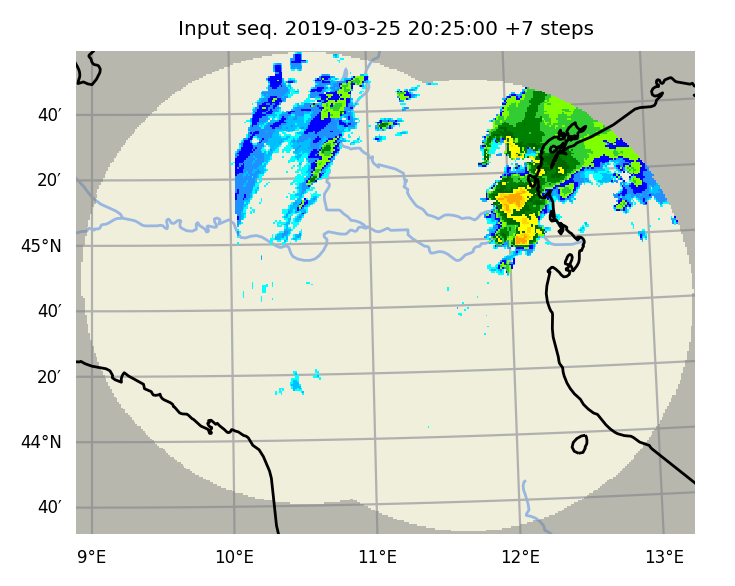

<Figure size 640x480 with 0 Axes>

In [5]:
plot_miarad(dbz_to_rainfall(input_data), title=f"Input seq. {dt}")

## Compute the forecast for the next hour (12 steps)


In [6]:
forecast8 = gpt8.forecast(input_data, steps=12, units='dbz', verbosity=2)
forecast16 = gpt16.forecast(input_data, steps=12, units='dbz', verbosity=2)

Using window size of 8x8 tokens


Working with z of shape torch.Size([1, 8, 133, 24]) = 25536 dimensions.


Timestep: 100%|██████████| 12/12 [00:57<00:00,  4.83s/it]


Using window size of 16x16 tokens
Working with z of shape torch.Size([1, 8, 133, 24]) = 25536 dimensions.


Timestep: 100%|██████████| 12/12 [06:40<00:00, 33.41s/it]


### plot the forecasts

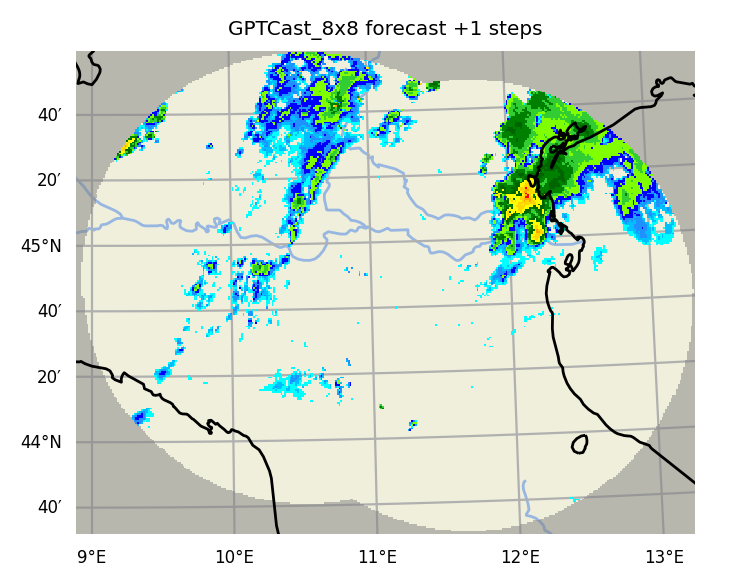

<Figure size 640x480 with 0 Axes>

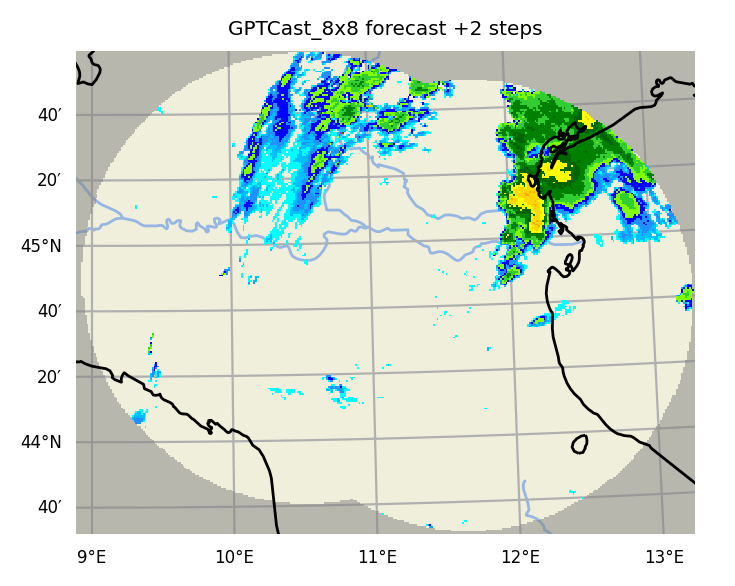

<Figure size 640x480 with 0 Axes>

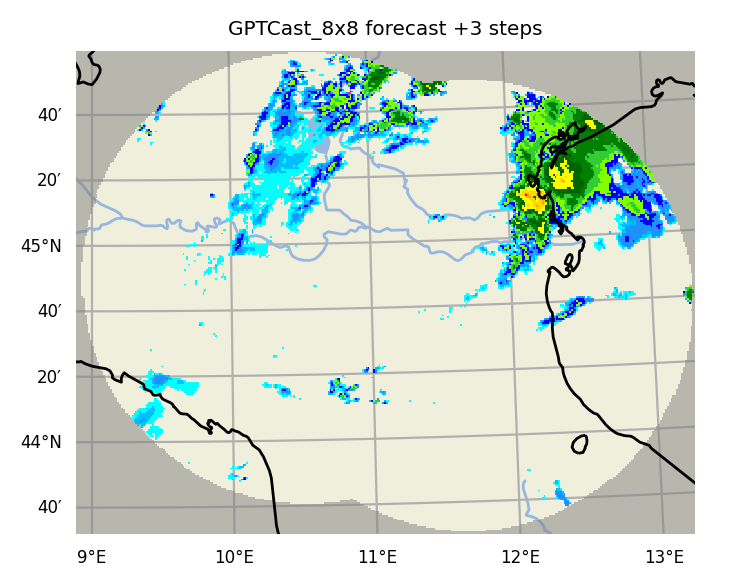

<Figure size 640x480 with 0 Axes>

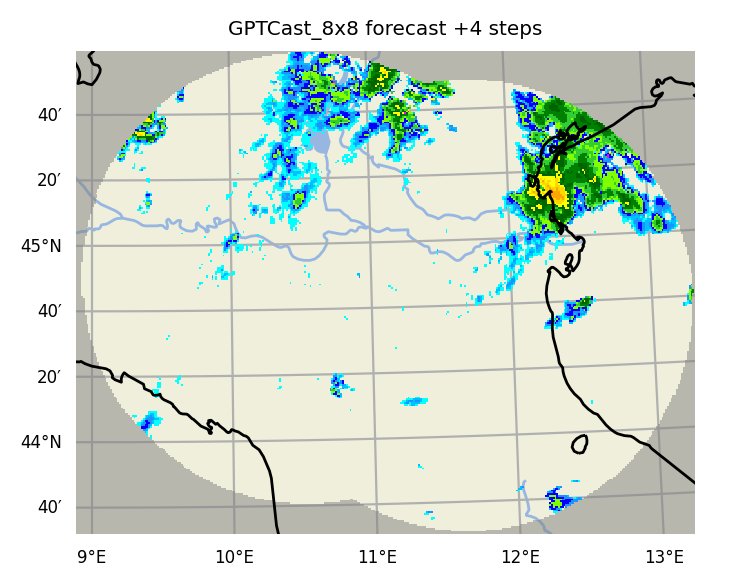

<Figure size 640x480 with 0 Axes>

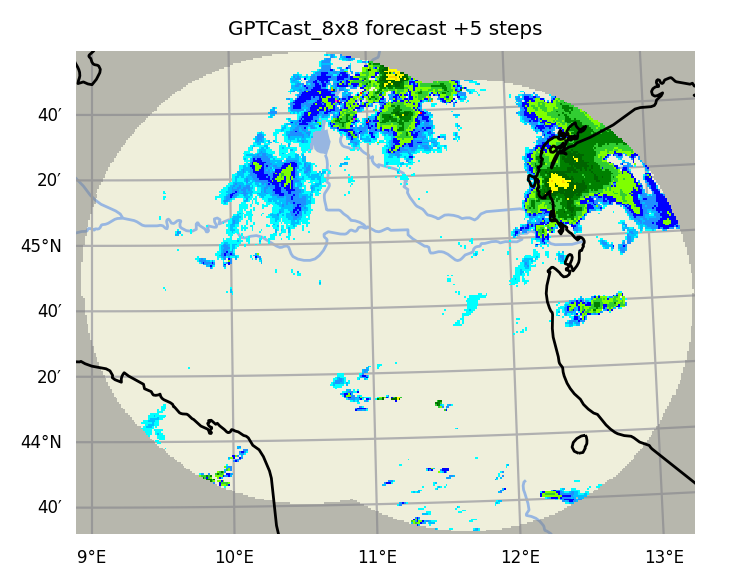

<Figure size 640x480 with 0 Axes>

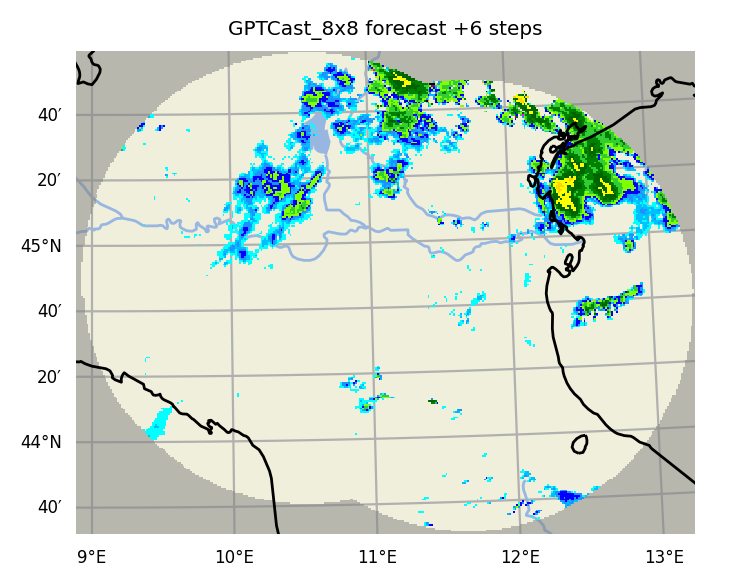

<Figure size 640x480 with 0 Axes>

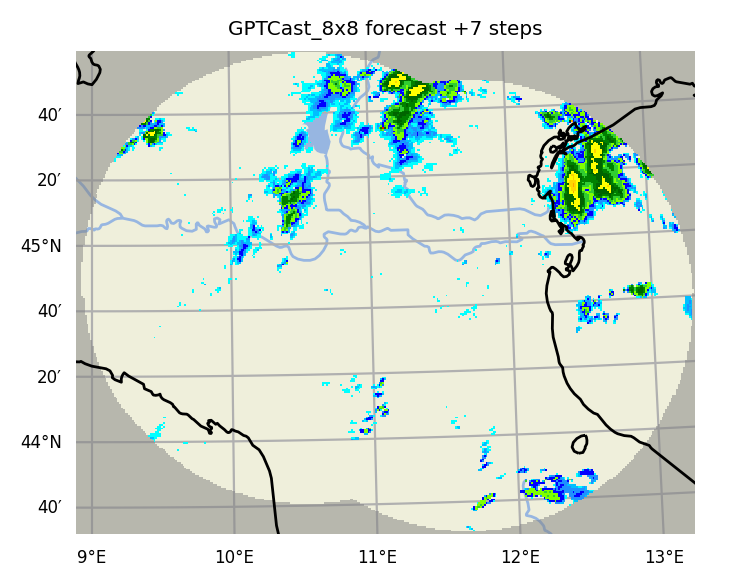

<Figure size 640x480 with 0 Axes>

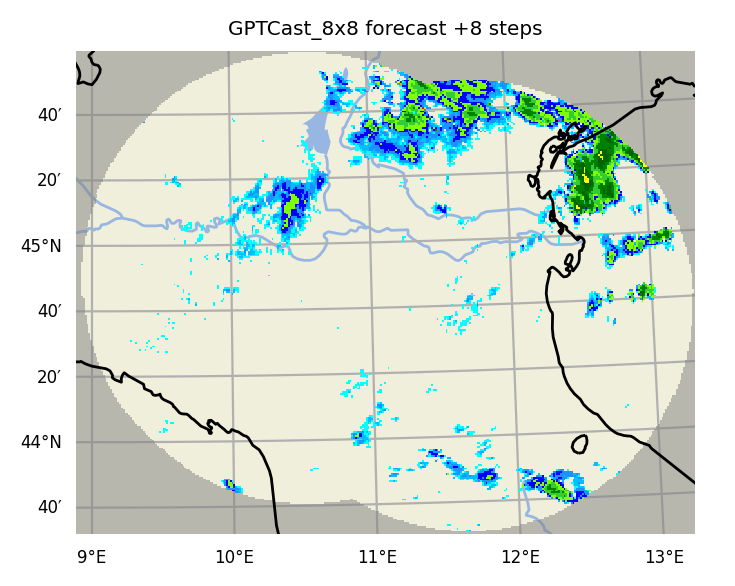

<Figure size 640x480 with 0 Axes>

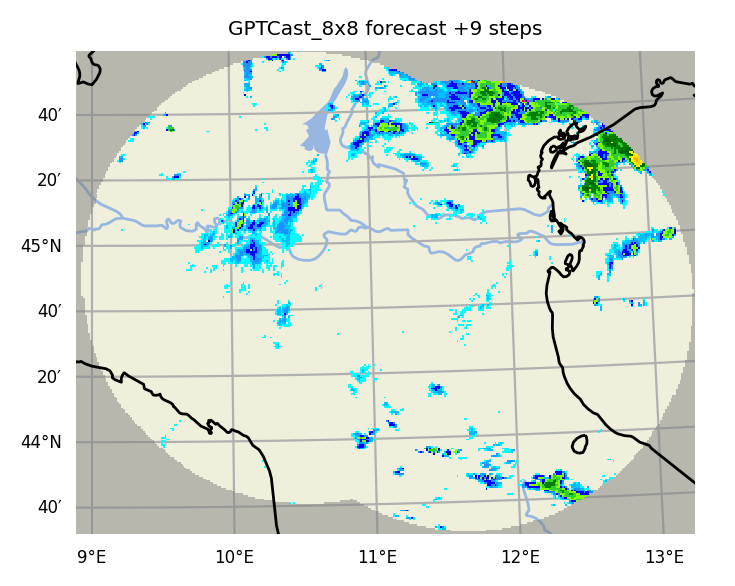

<Figure size 640x480 with 0 Axes>

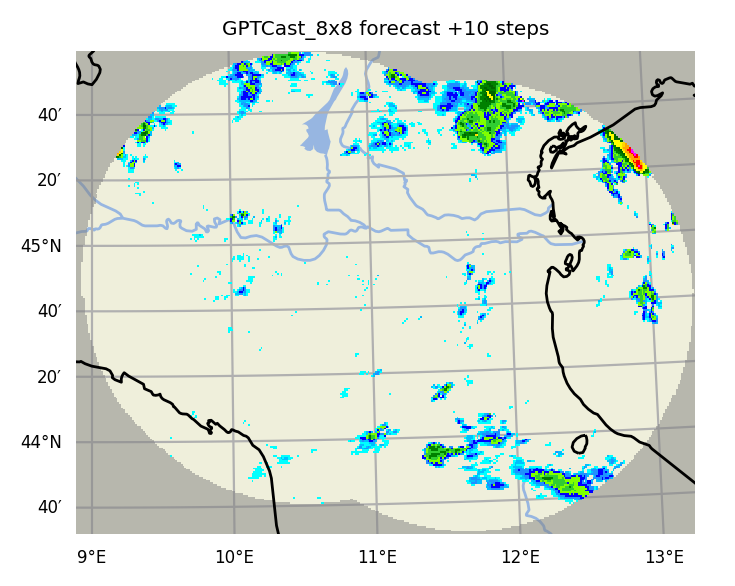

<Figure size 640x480 with 0 Axes>

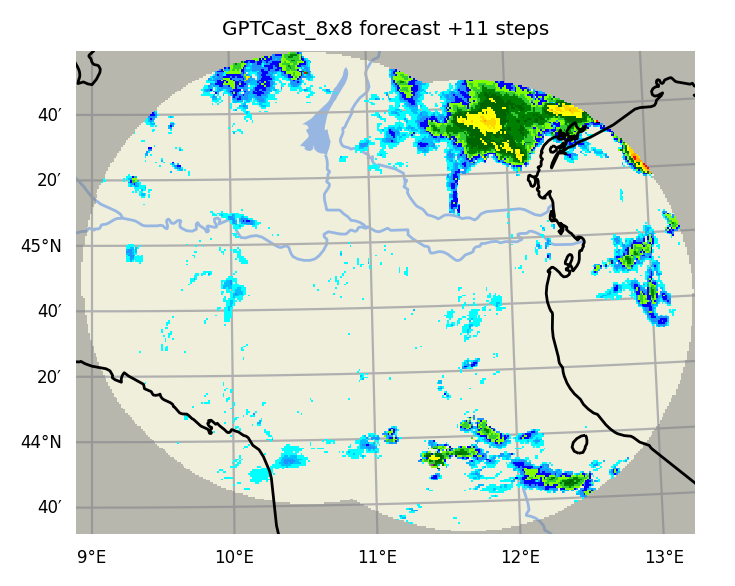

<Figure size 640x480 with 0 Axes>

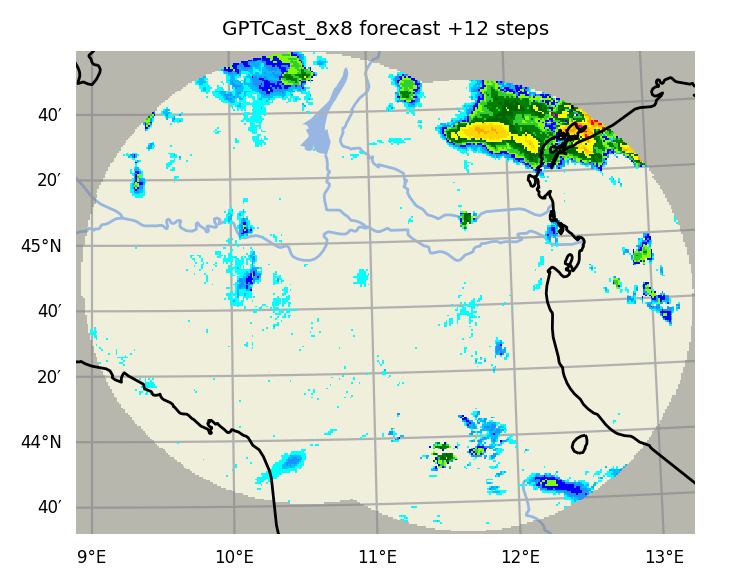

<Figure size 640x480 with 0 Axes>

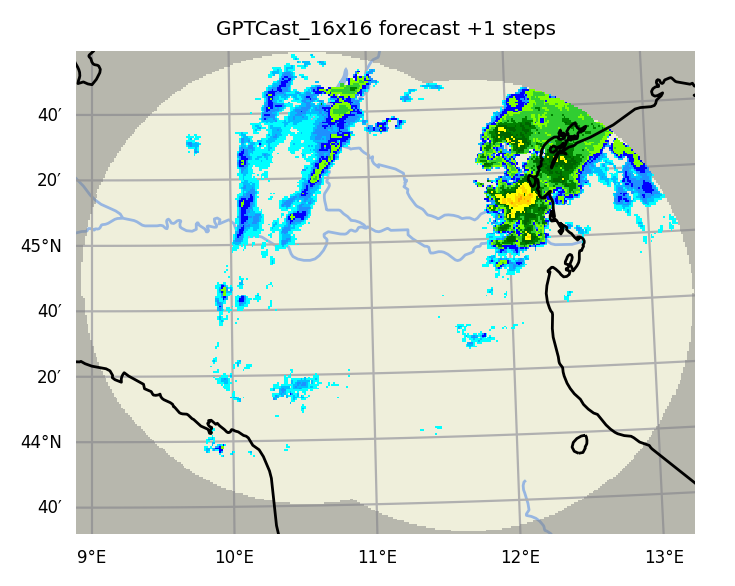

<Figure size 640x480 with 0 Axes>

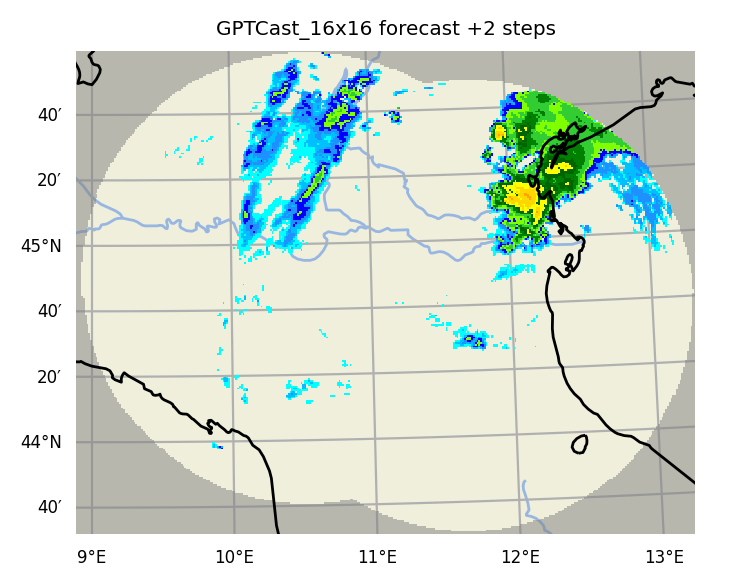

<Figure size 640x480 with 0 Axes>

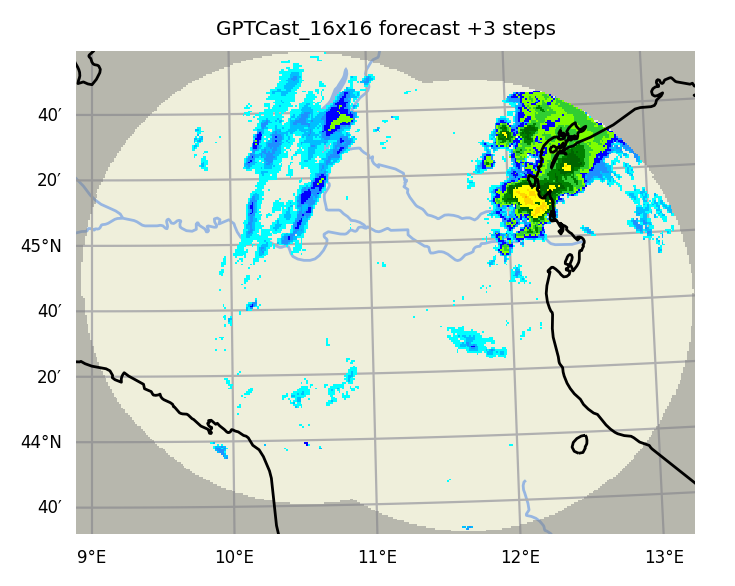

<Figure size 640x480 with 0 Axes>

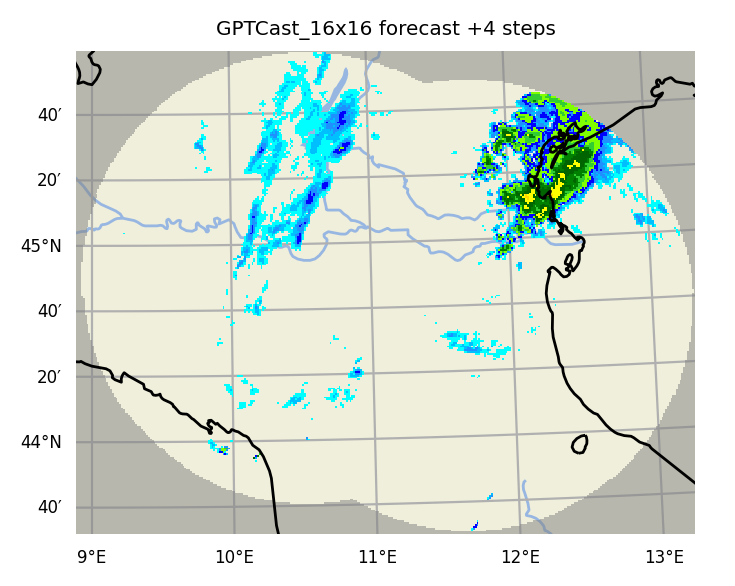

<Figure size 640x480 with 0 Axes>

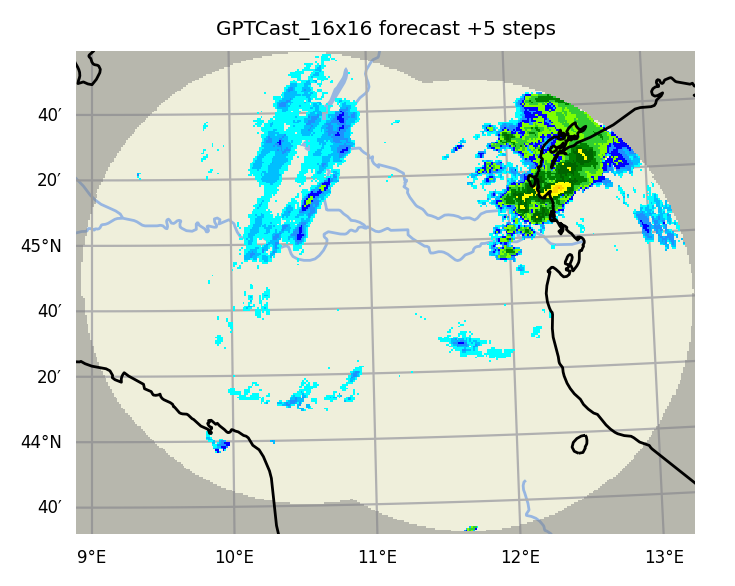

<Figure size 640x480 with 0 Axes>

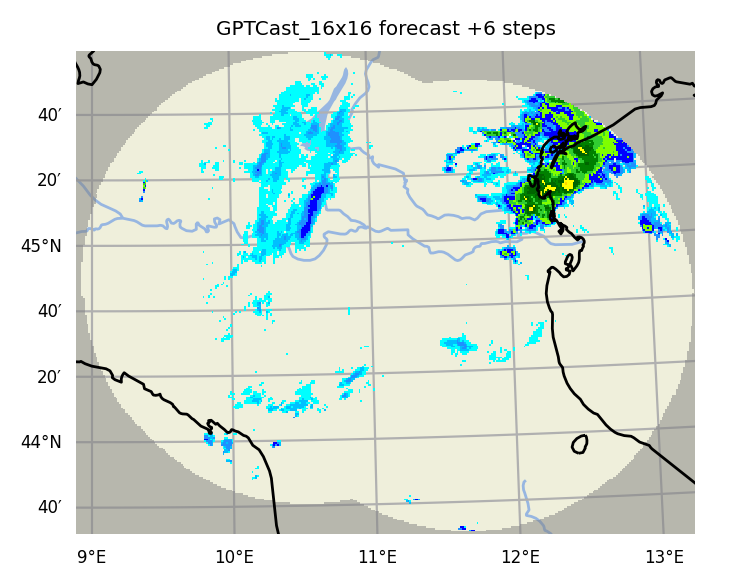

<Figure size 640x480 with 0 Axes>

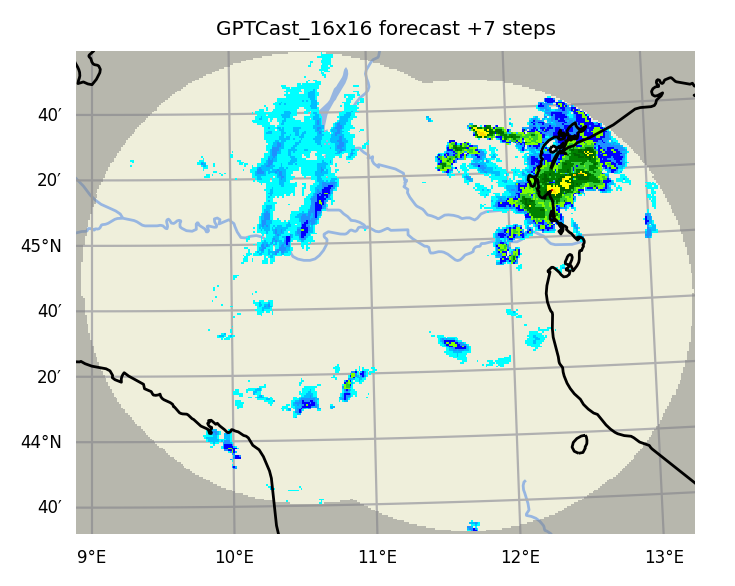

<Figure size 640x480 with 0 Axes>

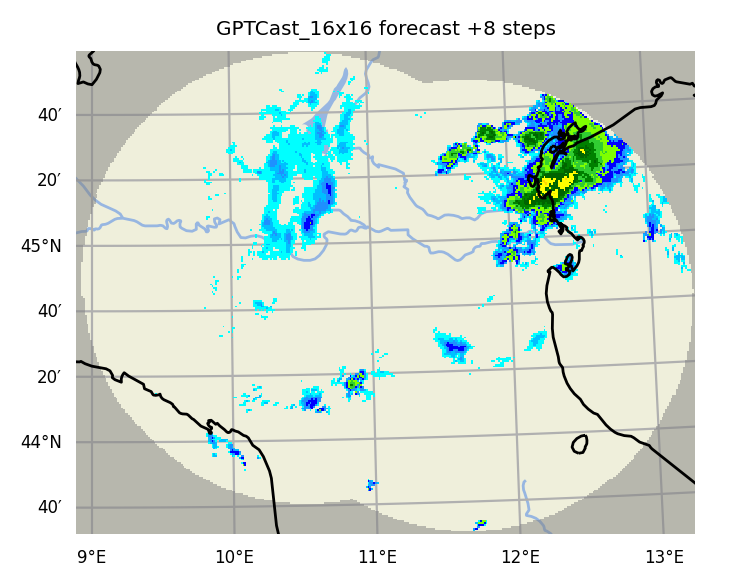

<Figure size 640x480 with 0 Axes>

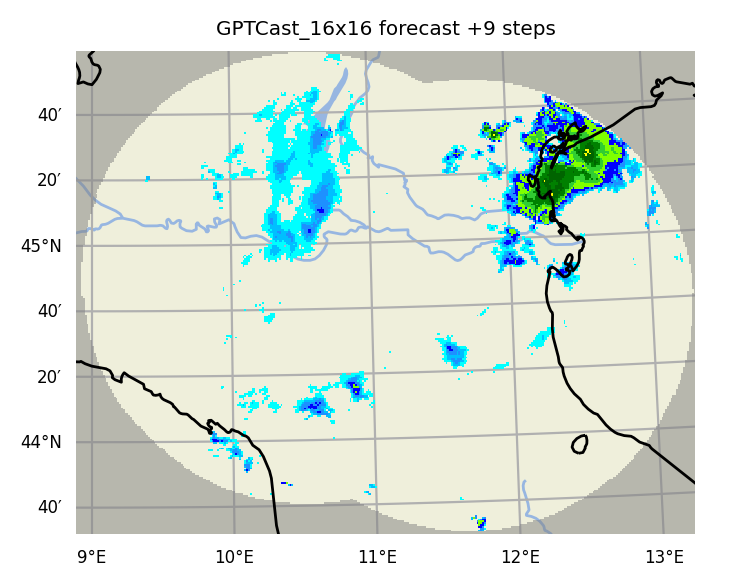

<Figure size 640x480 with 0 Axes>

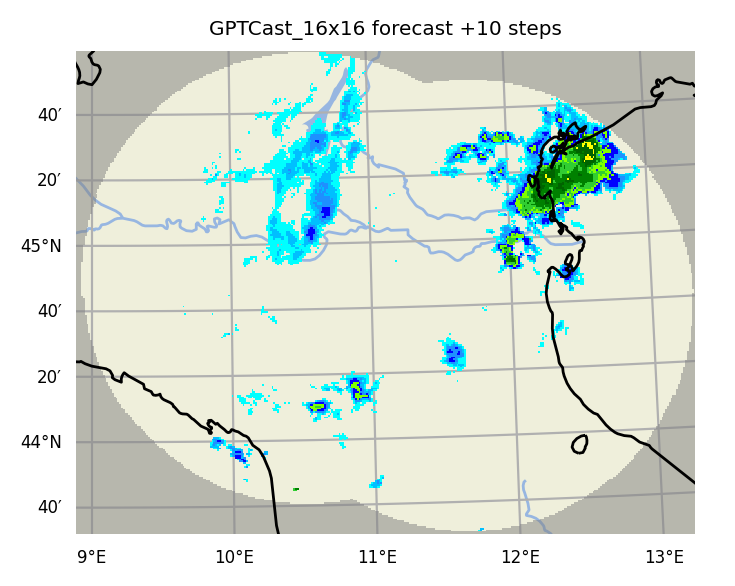

<Figure size 640x480 with 0 Axes>

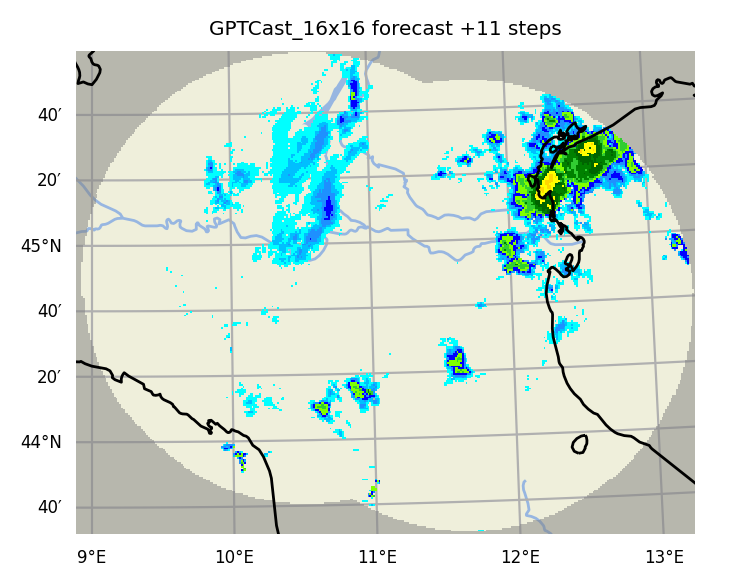

<Figure size 640x480 with 0 Axes>

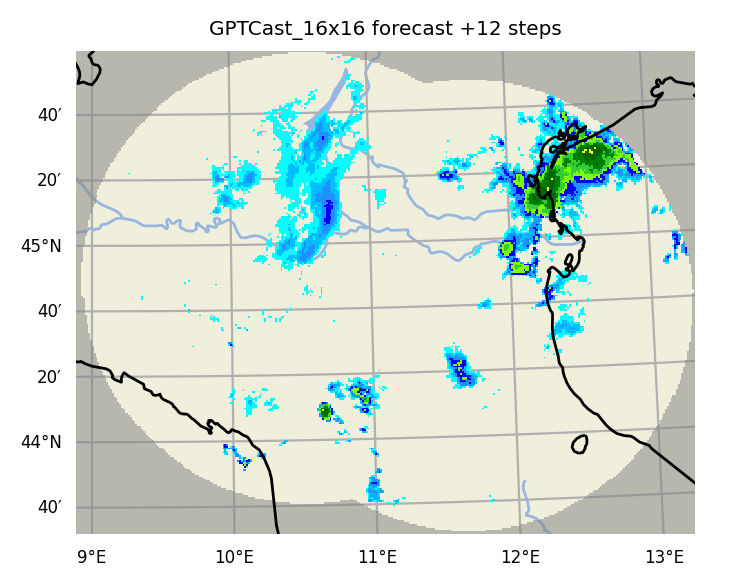

<Figure size 640x480 with 0 Axes>

In [14]:
plot_miarad(dbz_to_rainfall(forecast8), title="GPTCast_8x8 forecast")
plot_miarad(dbz_to_rainfall(forecast16), title="GPTCast_16x16 forecast")